In [2]:
#Data From Political Social Media Posts - https://www.kaggle.com/datasets/crowdflower/political-social-media-posts?resource=download

In [3]:
import pandas as pd
#from pandas_profiling import ProfileReport - to be depracated by April 1st
from ydata_profiling import ProfileReport
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
import re
from collections import Counter
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


In [4]:
#Retrieve Data
data = pd.read_csv('political_social_media.csv', encoding_errors= "ignore")
list(data.columns)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'audience',
 'audience:confidence',
 'bias',
 'bias:confidence',
 'message',
 'message:confidence',
 'orig__golden',
 'audience_gold',
 'bias_gold',
 'bioid',
 'embed',
 'id',
 'label',
 'message_gold',
 'source',
 'text']

In [5]:
#View Top Entries
data.head(5)

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  766192484    False   finalized                   1      8/4/15 21:17   
1  766192485    False   finalized                   1      8/4/15 21:20   
2  766192486    False   finalized                   1      8/4/15 21:14   
3  766192487    False   finalized                   1      8/4/15 21:08   
4  766192488    False   finalized                   1      8/4/15 21:26   

   audience  audience:confidence      bias  bias:confidence  message  ...  \
0  national                  1.0  partisan              1.0   policy  ...   
1  national                  1.0  partisan              1.0   attack  ...   
2  national                  1.0   neutral              1.0  support  ...   
3  national                  1.0   neutral              1.0   policy  ...   
4  national                  1.0  partisan              1.0   policy  ...   

   orig__golden  audience_gold  bias_gold    bioid  \
0           NaN            NaN        NaN  R000596   
1           NaN            NaN        NaN  M000355   
2           NaN            NaN        NaN  S001180   
3           NaN            NaN        NaN  C000880   
4           NaN            NaN        NaN  U000038   

                                               embed           id  \
0  <blockquote class="twitter-tweet" width="450">...  3.83249E+17   
1  <blockquote class="twitter-tweet" width="450">...  3.11208E+17   
2  <blockquote class="twitter-tweet" width="450">...  3.39069E+17   
3  <blockquote class="twitter-tweet" width="450">...  2.98528E+17   
4  <blockquote class="twitter-tweet" width="450">...  4.07643E+17   

                                              label message_gold   source  \
0    From: Trey Radel (Representative from Florida)          NaN  twitter   
1     From: Mitch McConnell (Senator from Kentucky)          NaN  twitter   
2  From: Kurt Schrader (Representative from Oregon)          NaN  twitter   
3          From: Michael Crapo (Senator from Idaho)          NaN  twitter   
4          From: Mark Udall (Senator from Colorado)          NaN  twitter   

                                                text  
0  RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...  
1  VIDEO - #Obamacare:  Full of Higher Costs and ...  
2  Please join me today in remembering our fallen...  
3  RT @SenatorLeahy: 1st step toward Senate debat...  
4  .@amazon delivery #drones show need to update ...  

[5 rows x 21 columns]

In [6]:
#Data Summary - https://www.linkedin.com/pulse/summarizing-exploring-datasets-using-jupyter-notebooks-joseph-true/
profile = ProfileReport(data, title="My Data Profile Report")
# profile.to_notebook_iframe()
# profile.to_widgets()

In [14]:
#Perform Text Analysis
comments = data['text']
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
comments_histogram = Counter()
for comment in comments:
    parsed_comment = nlp(str(comment))
    for token in parsed_comment:
        lemma = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemma):
            if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
                comments_histogram[lemma] += 1

comments_sorted_lemma_count_pairs = comments_histogram.most_common(100)
for lemma, count in comments_sorted_lemma_count_pairs:
    print(lemma, ":", count)

today : 784
work : 464
house : 444
great : 428
amp : 409
new : 371
year : 371
bill : 363
job : 360
day : 358
thank : 345
help : 333
time : 323
president : 318
family : 317
need : 313
act : 308
vote : 291
congress : 290
state : 278
law : 270
support : 268
health : 262
people : 243
join : 242
service : 240
week : 238
american : 234
government : 233
pass : 232
obamacare : 231
care : 228
community : 226
good : 225
veteran : 219
rt : 214
senate : 212
americans : 212
continue : 210
honor : 209
business : 204
read : 203
visit : 202
student : 201
office : 195
obama : 189
federal : 186
national : 186
like : 182
talk : 178
meet : 176
morning : 172
school : 170
know : 170
discuss : 169
budget : 167
watch : 164
high : 162
proud : 161
woman : 159
come : 157
look : 157
speak : 157
issue : 156
live : 156
million : 154
economy : 152
country : 151
program : 151
reform : 149
member : 148
right : 147
washington : 147
protect : 146
county : 145
share : 145
district : 145
hear : 143
nation : 140
news : 138

C:\Users\nemma\AppData\Local\Temp\ipykernel_11048\4285265044.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Raw count')

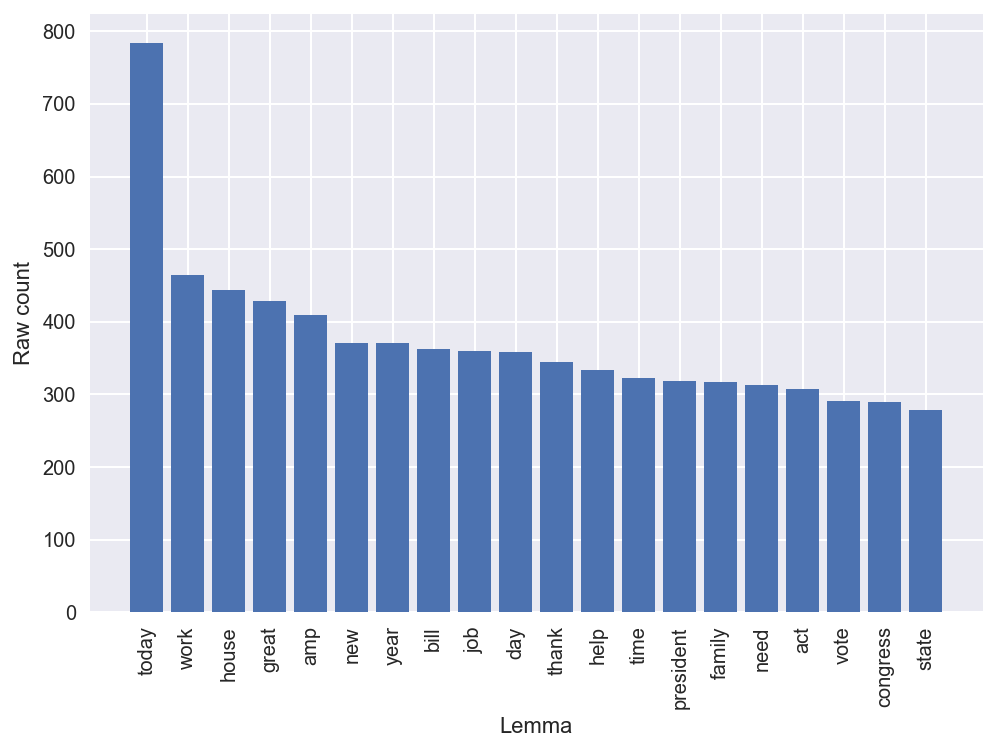

In [8]:
#Plot Top Words
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

num_top_lemmas_to_plot = 20
top_lemmas = [lemma for lemma, count in comments_sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in comments_sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')

In [9]:
tf_vectorizer = CountVectorizer(stop_words=['english','http','https','www'],
                                max_features=1000)
tf = tf_vectorizer.fit_transform(comments_histogram)
print(tf_vectorizer.get_feature_names_out())

['aaa' 'notable' 'notalawyer' 'notch' 'note' 'notforsale' 'notice'
 'noticeable' 'notify' 'notion' 'notiuno' 'notleade' 'notmybossbusiness'
 'notreadyforprimetime' 'notthefirsttime' 'notwithstanding' 'nouri' 'nov'
 'nova' 'november' 'nowisthetime' 'npr' 'nra' 'nrcs' 'nrsc' 'nsa'
 'nsaspeech' 'nsbw' 'nsep' 'nsf' 'ntma' 'ntsb' 'nuclear' 'nudge' 'nuestra'
 'nuestros' 'nuke' 'number' 'numerical' 'numerous' 'nun' 'nunez' 'nuns'
 'nurse' 'nurses' 'nutley' 'nutrition' 'nutritionnannies' 'nv' 'nvot' 'nw'
 'ny' 'nyc' 'nys' 'nyt' 'nytimes' 'nytownoftheday' 'oak' 'oakland' 'oath'
 'obama' 'obamabudget' 'obamacare' 'obamacareinthreeword' 'obamafailures'
 'obamaflightdelay' 'obamainisrael' 'obamanomic' 'obamascare'
 'obamasequester' 'obamcare' 'obamcareanswer' 'oberndorf' 'oberstar'
 'obesity' 'obey' 'obfuscation' 'object' 'objection' 'objective'
 'objetivo' 'obligate' 'obligation' 'oblige' 'observance' 'observation'
 'observe' 'observed' 'obsess' 'obstacle' 'obstruct' 'obstruction'
 'obstructionis

In [10]:
num_topics = 20

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [11]:
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
num_top_words = 1000

def print_top_words(topic_word_distributions, num_top_words, tf_vectorizer):
    vocab = tf_vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 1000 words per topic and their probabilities within the topic...

[Topic 0]
perdido : 0.010714285714285269
parenthood : 0.010714285714285269
pleasanton : 0.010714285714285269
olney : 0.010714285714285269
older : 0.010714285714285269
particulate : 0.010714285714285269
offense : 0.010714285714285269
past : 0.010714285714285269
ocs : 0.010714285714285269
reduction : 0.010714285714285269
paterson : 0.010714285714285269
pin : 0.010714285714285269
patient : 0.010714285714285269
pc : 0.010714285714285269
pcb : 0.010714285714285269
obama : 0.010714285714285269
omaha : 0.010714285714285269
reap : 0.010714285714285269
onlyinaz : 0.010714285714285269
pursue : 0.010714285714285269
outdoor : 0.010714285714285269
overbear : 0.010714285714285269
quit : 0.010714285714285269
quincy : 0.010714285714285269
overly : 0.010714285714285269
ramon : 0.010714285714285269
origin : 0.010714285714285269
nytimes : 0.010714285714285269
organize : 0.010714285714285269
quarterly : 0.0107142857142852

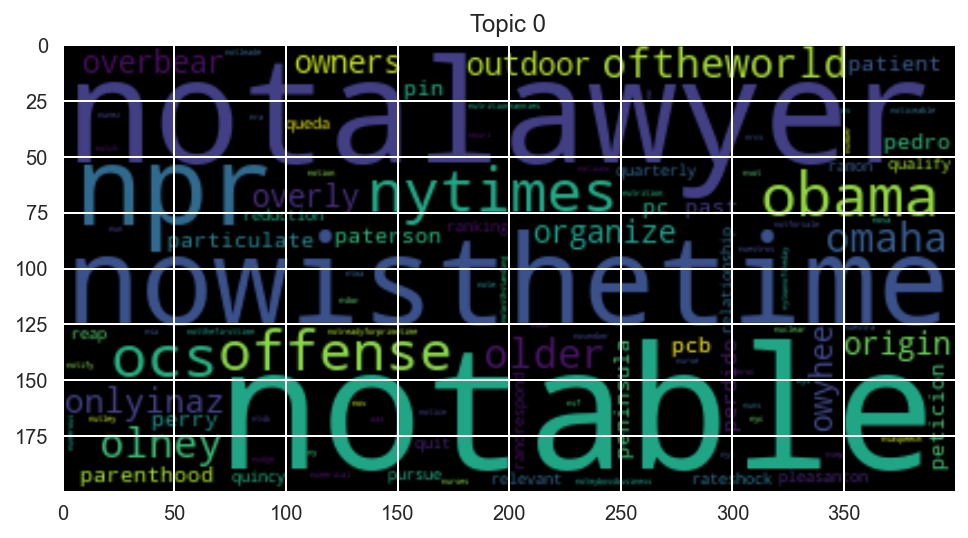

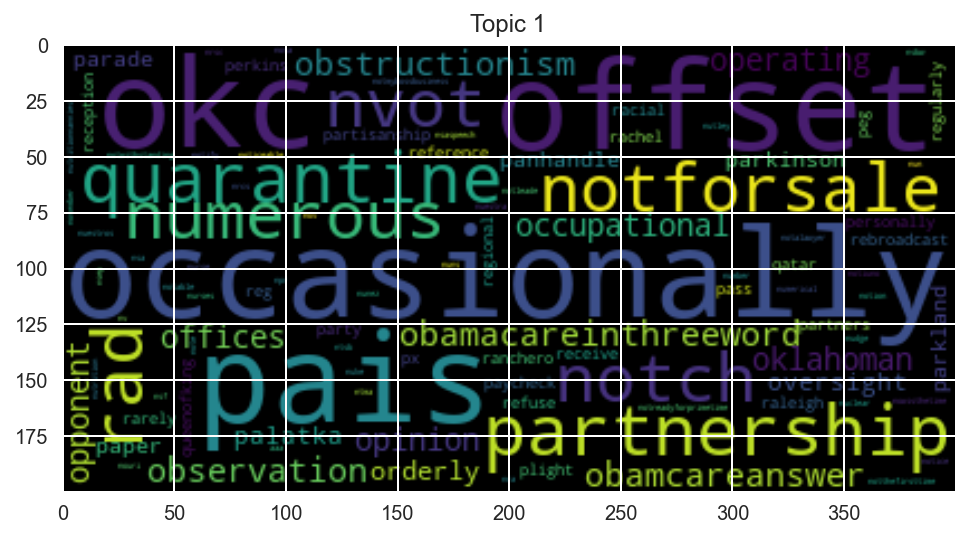

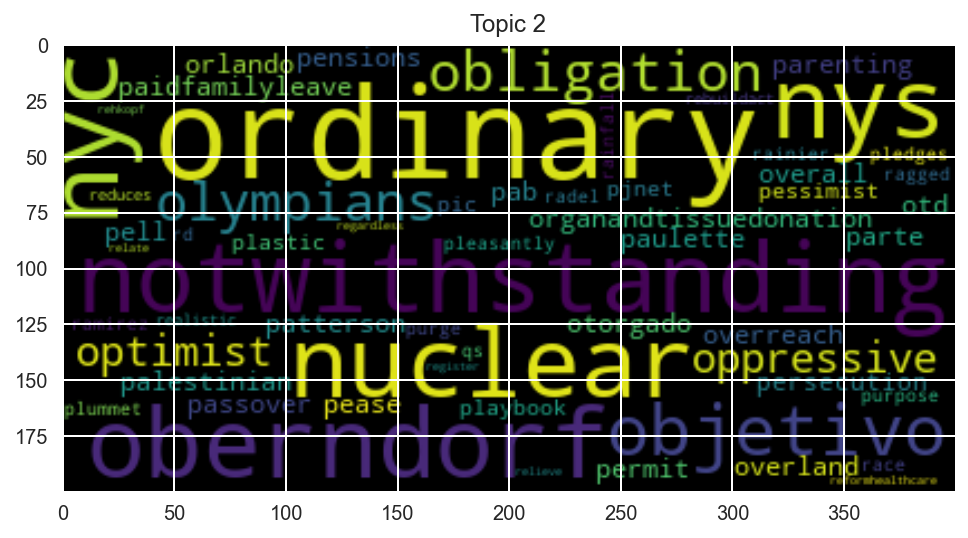

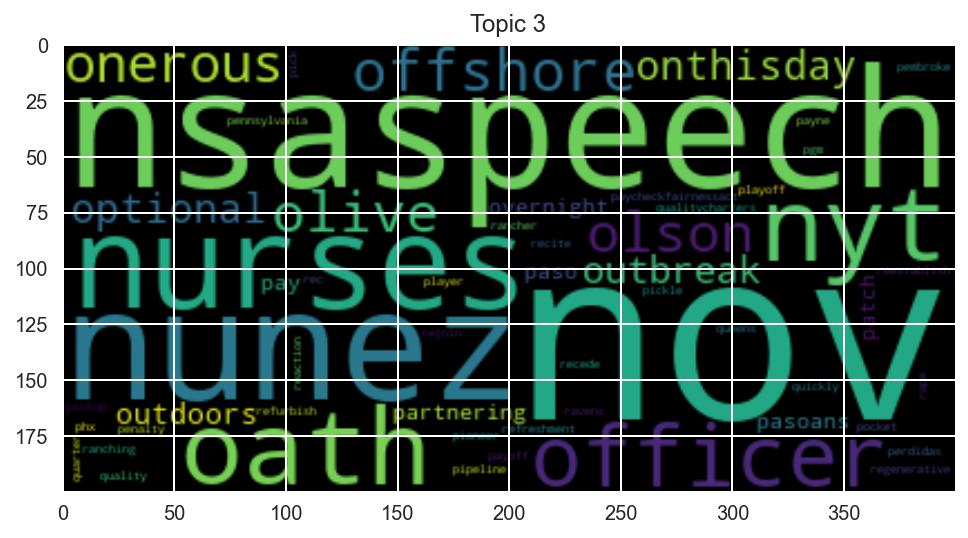

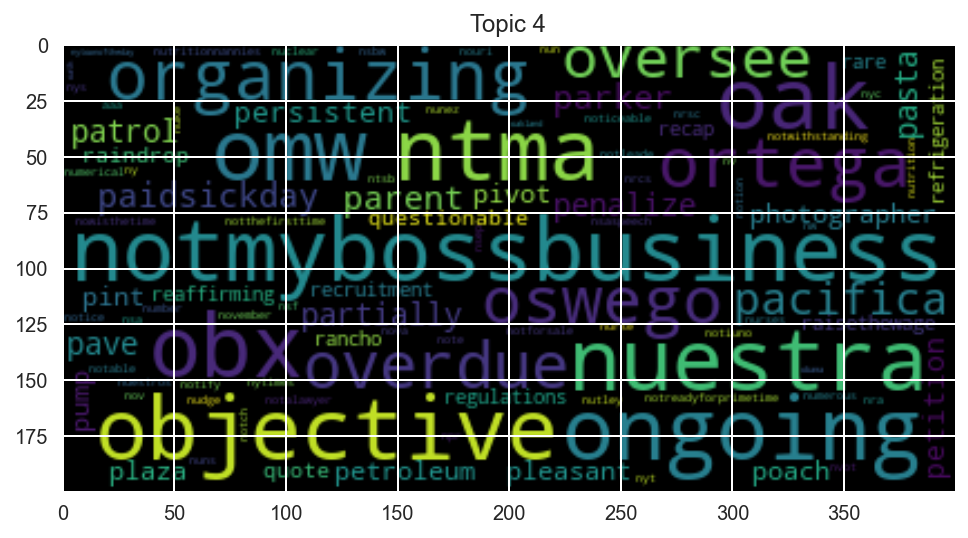

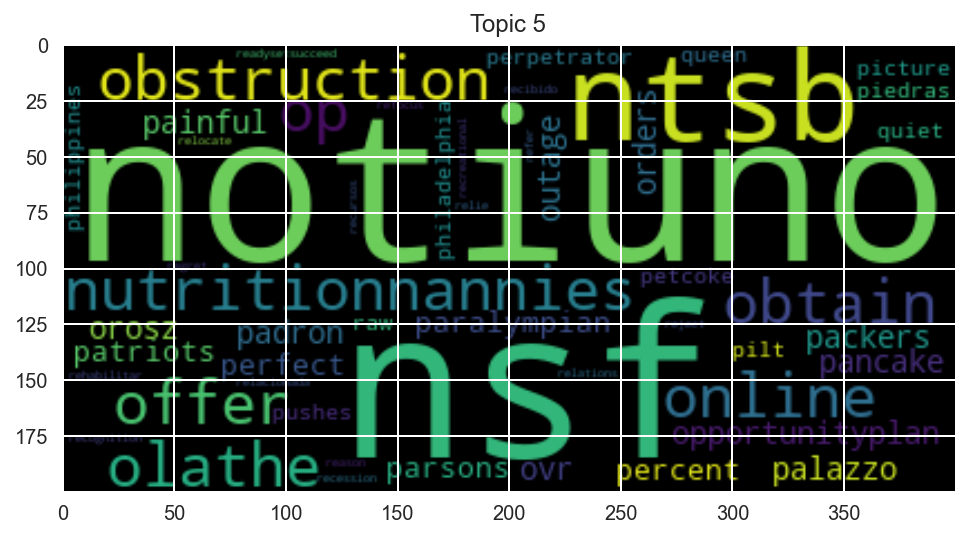

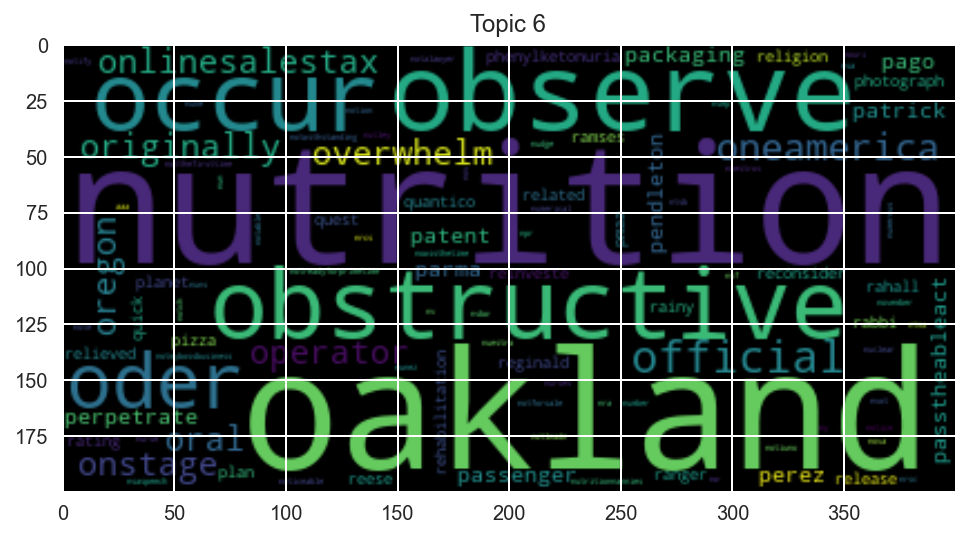

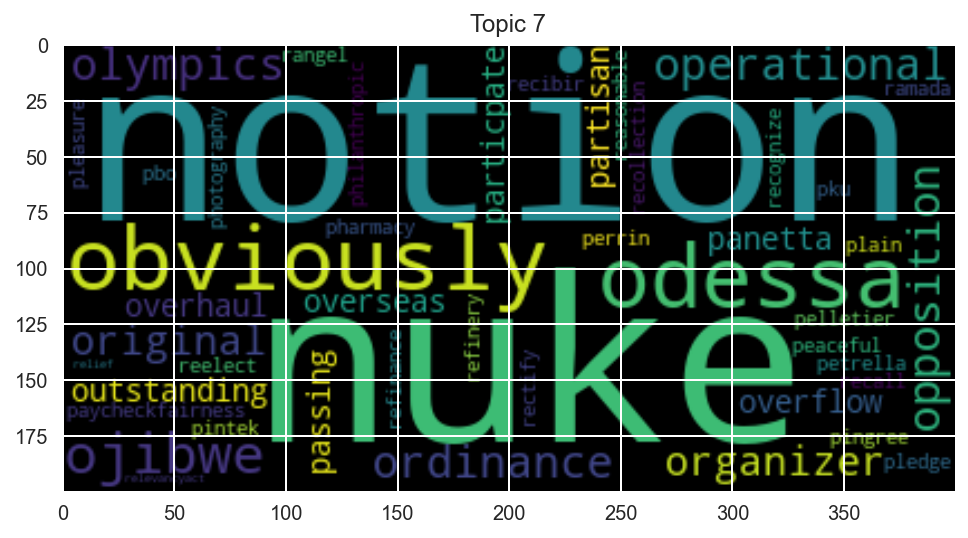

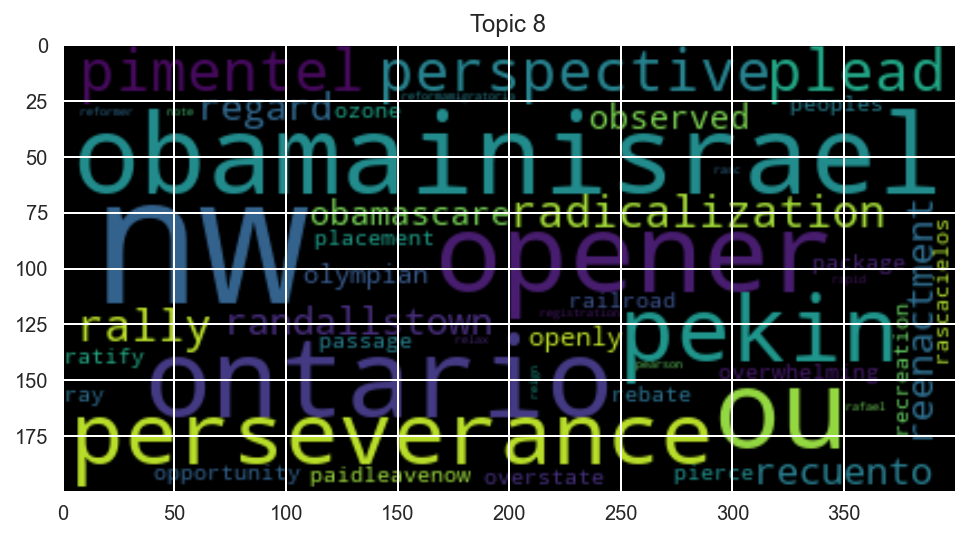

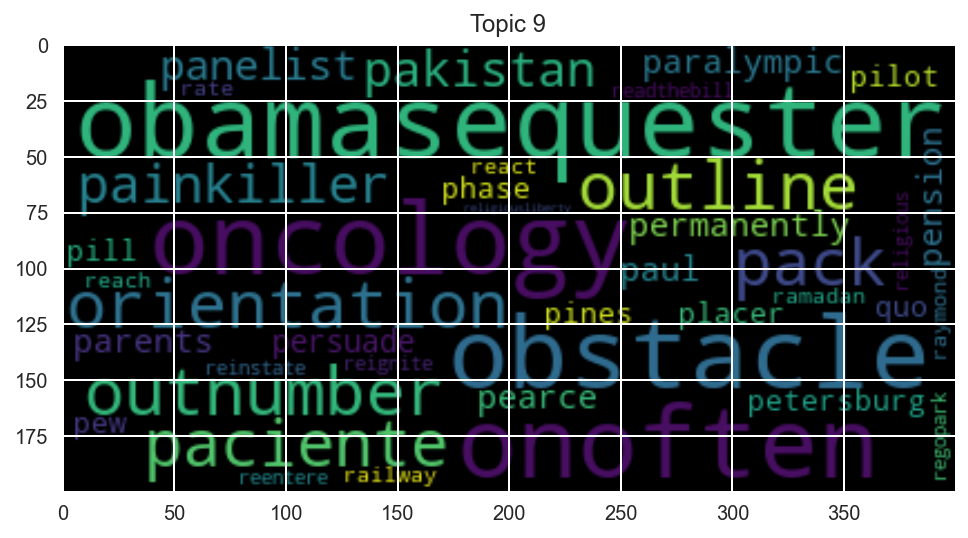

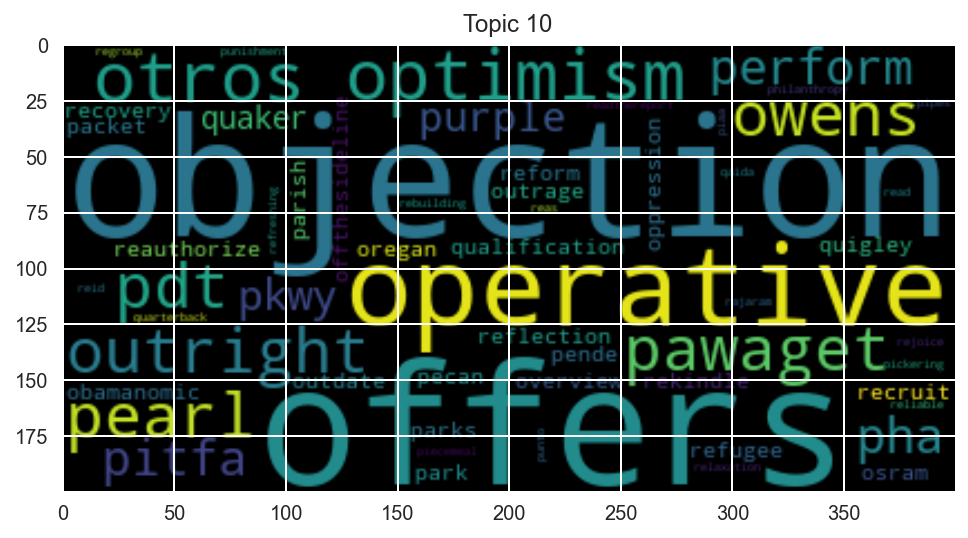

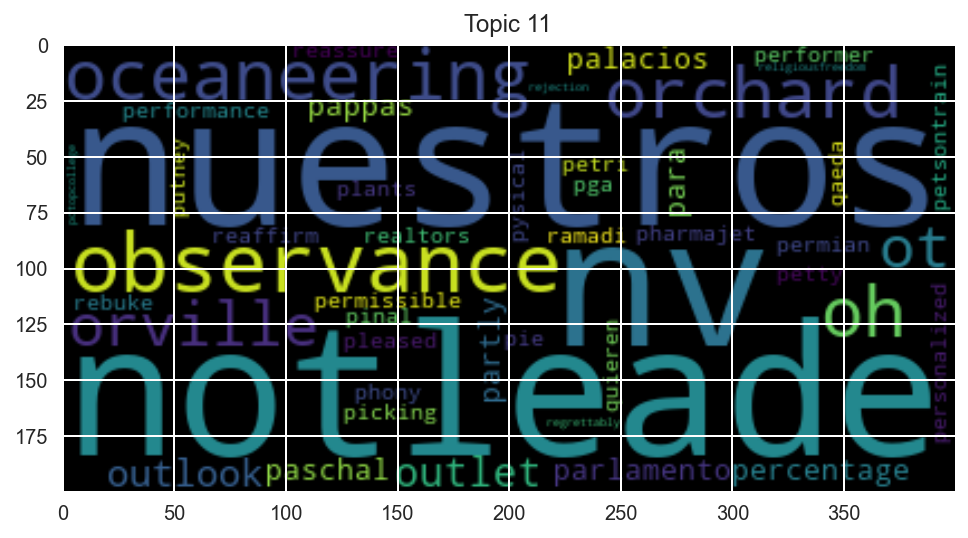

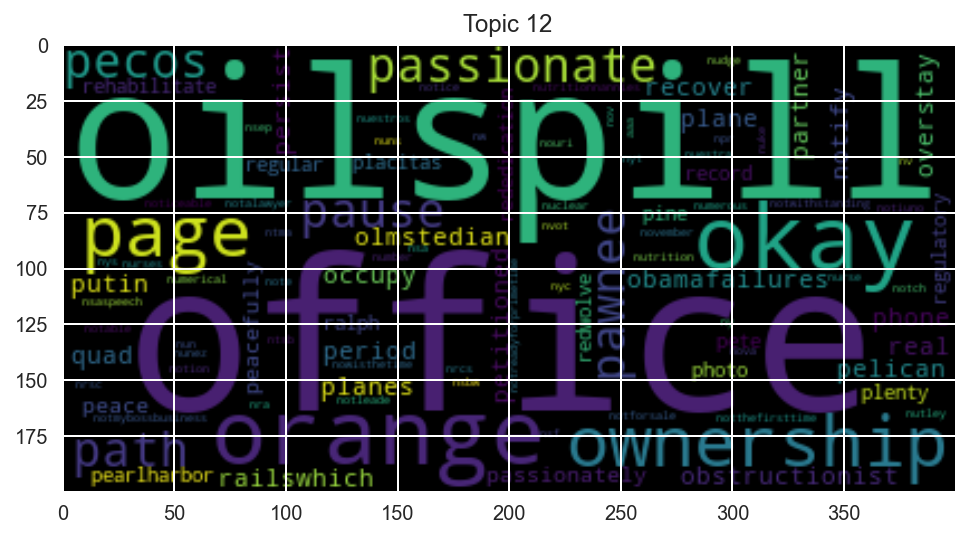

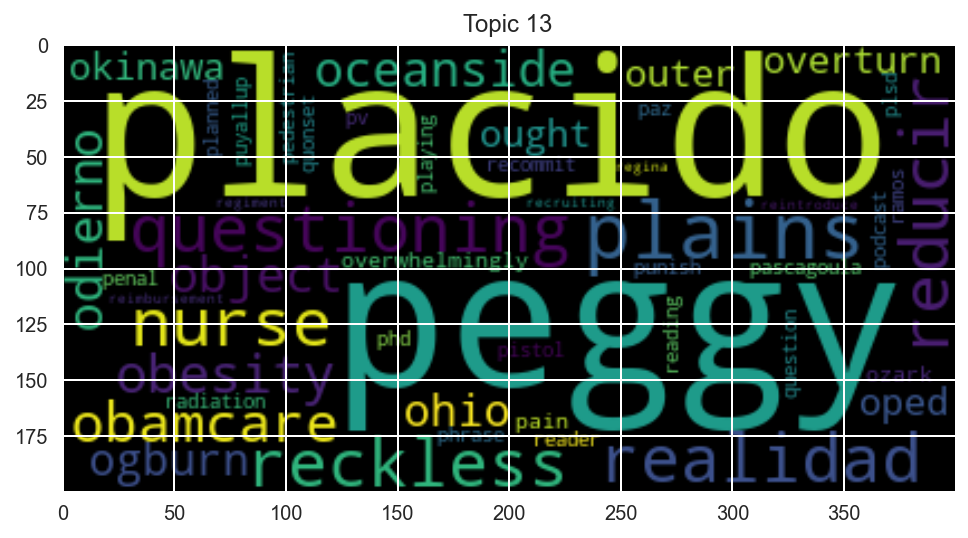

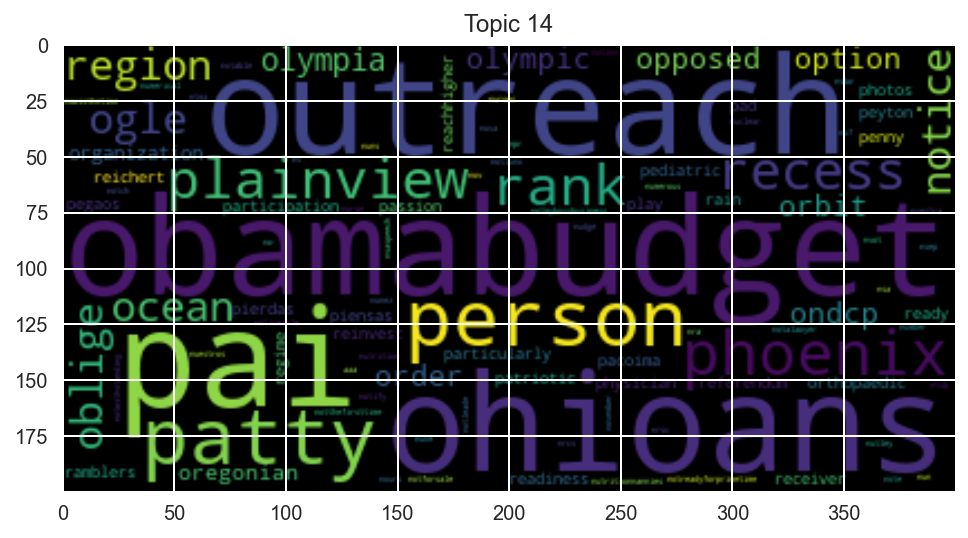

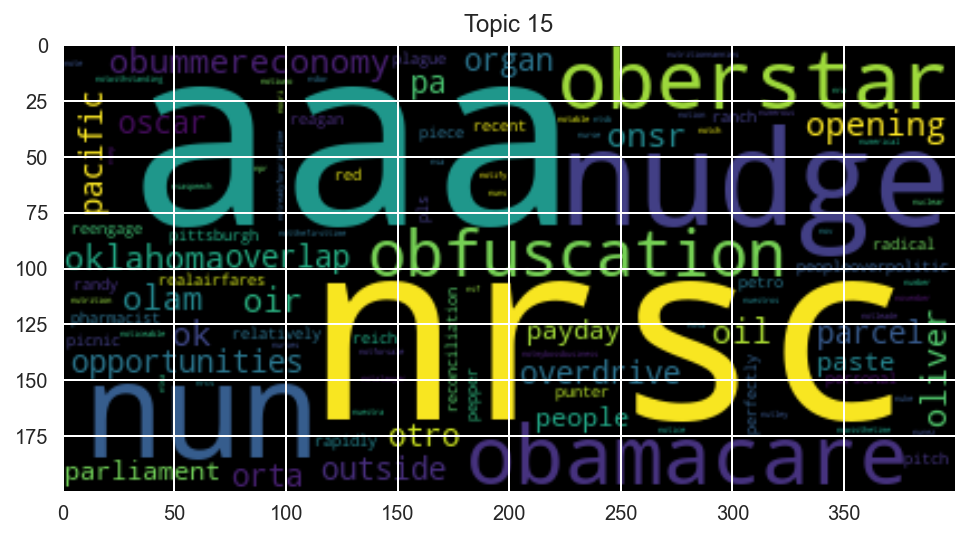

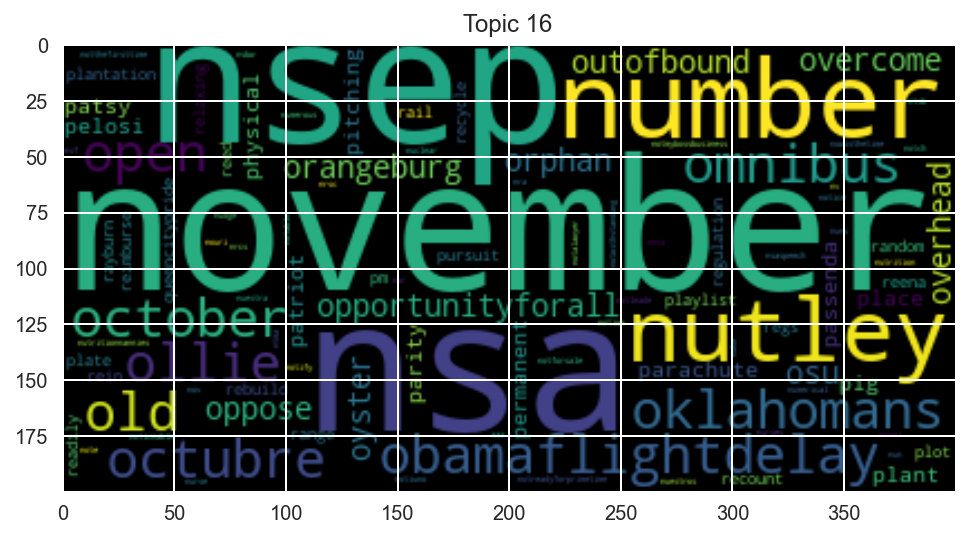

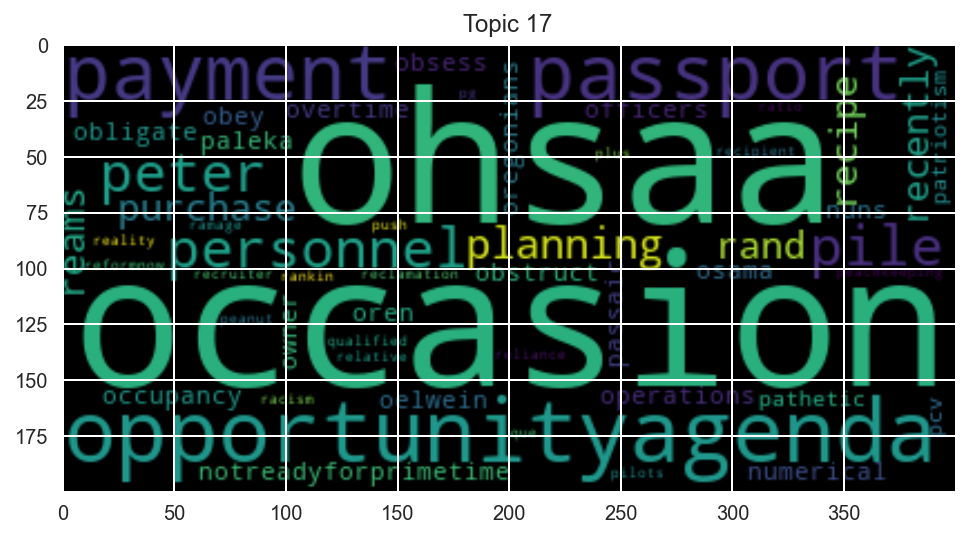

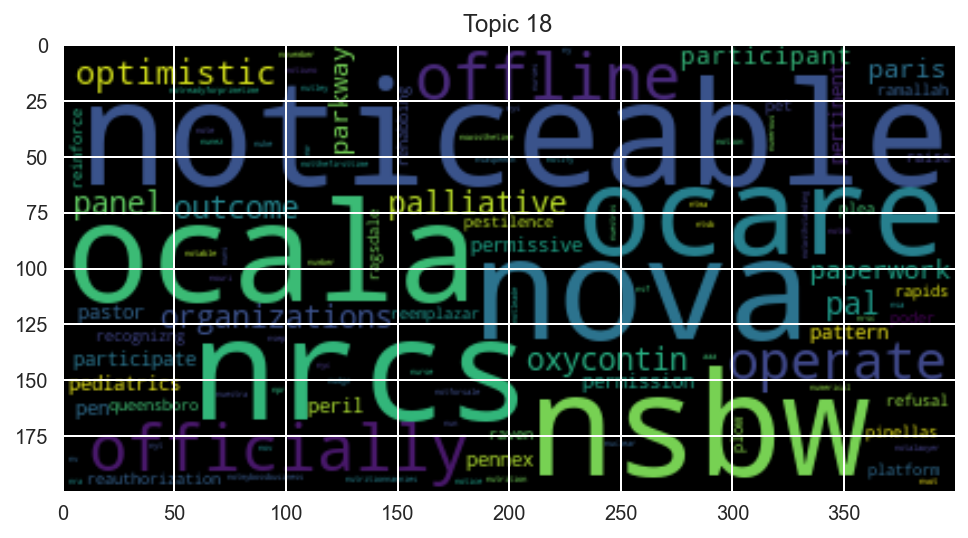

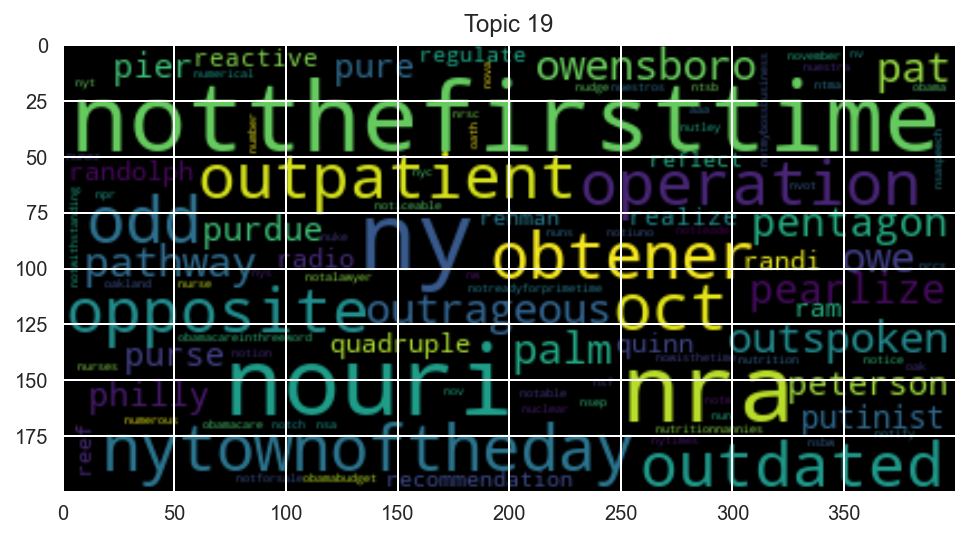

In [12]:
num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names_out()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)